## How to start coding using Python language:

1. Using Anaconda distribution: Download and install Anaconda from [here](https://www.anaconda.com/products/distribution). Install and lunch jupyter-notebook or jupyterlab from there.

2. Using jupyterhub with you Aalto email address from [here](https://scicomp.aalto.fi/aalto/jupyterhub/).

3. Google colab


In [1]:
import numpy as np

### Exercise 1. Array creation and accessing elements in an array
Create a 2d array (a matrix) $\mathbf{M}$ of shape (3, 2), containing 6 values.

Access element in the second row and first column.

Access the second row of the matrix and name it $\mathbf{v}$. What is the shape of this vector?

Compute the Matrix-Vector multiplication of $\mathbf{v}$ and $\mathbf{M}$.

In [2]:
M = np.array([[1, 2], [4, 5], [6, 9]])
M

array([[1, 2],
       [4, 5],
       [6, 9]])

In [3]:
M[1, 0]

4

In [4]:
v = M[1]
v

array([4, 5])

In [5]:
v.shape

(2,)

In [6]:
M @ v

array([14, 41, 69])

### Exercise 2.
Find the Euclidean norm of a vector (1d array) using NumPy

$\|{\mathbf{x}}_2\| = \sqrt{\sum_{i=1}^n x_i^2} $

In [7]:
def euclidean_norm_numpy(x):
    res = np.sqrt(np.sum(x**2))
    return res

my_vector = np.array([0.5, -1.2, 3.3, 4.5])
euclidean_norm_numpy(my_vector)

5.729746940310715

In [8]:
np.linalg.norm(my_vector)

5.729746940310715

### Exercise 3.
Write a function that computes the Euclidean norms of a matrix (2d array) in a row-wise fashion. Hint: use the axis argument of `np.sum`.


In [9]:
def euclidean_norm_2d(X):
    norm_X = np.sqrt(np.sum(X**2 , axis =1))
    return norm_X


In [10]:
my_matrix = np.array([[0.5, -1.2, 4.5],
                      [-3.2, 1.9, 2.7]])
# Should return an array of size 2.
euclidean_norm_2d(my_matrix)

array([4.68401537, 4.59782557])

In [11]:
# another way
np.linalg.norm(my_matrix, axis =1)

array([4.68401537, 4.59782557])

### Exercise 4. Solving linear equations
Consider the problem of solving $\mathbf{A} \mathbf{x} = \mathbf{b}$.
\begin{align*}
    2 x_1 + 3 x_2 + 4 x_3 &= 19\\
    4 x_1 + 11 x_2 + 14 x_3 &= 55\\
    2 x_1 + 8 x_2 + 17 x_3 &= 50
\end{align*}
In the lecture slides, we found $\mathbf{x}$ using Gaussian elimination method. The solution was $\mathbf{x} = \begin{bmatrix} 4 \\ 1\\ 2 \end{bmatrix}$.

Write a numpy code for solving $\mathbf{x}$


In [12]:
A = np.array([[2, 3, 4], [4, 11, 14], [2, 8, 17]])
b = np.array([[19, 55, 50]]).T
b

array([[19],
       [55],
       [50]])

In [13]:
np.linalg.inv(A) @ b

array([[4.],
       [1.],
       [2.]])

In [14]:
np.linalg.solve(A, b) # numerically more stable

array([[4.],
       [1.],
       [2.]])

### Exercise 5. Compute Jacobian

For the $ \mathbf{f}: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ and the vector $\mathbf{x} =\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} $
 we have the vector-value function as $f = \begin{bmatrix} x_1^2 x_2 \\ 5 x_1 + \sin{x_2} \end{bmatrix}$. We want to find the jacobian of $\mathbf{f}$.
 
We have $f_1(\mathbf{x}) = x_1^2 x_2$ and $f_2(\mathbf{x}) = 5 x_1 + \sin{x_2}$

Jacobian is: 
\begin{equation*}
    \mathbf{F}_{\mathbf{x}}(\mathbf{x}) = \begin{bmatrix} \frac{\partial \mathbf{f(\mathbf{x})}}{\partial{x_1}} & \frac{\partial \mathbf{f(\mathbf{x})}}{\partial {x_2}} \end{bmatrix} =  \begin{bmatrix} \frac{\partial {f_1(\mathbf{x})}}{\partial{x_1}} & \frac{\partial {f_1(\mathbf{x})}}{\partial{x_2}} \\ \frac{\partial {f_2(\mathbf{x})}}{\partial{x_1}} & \frac{\partial {f_2(\mathbf{x})}}{\partial{x_2}} \end{bmatrix} = 
\begin{bmatrix}  2x_1 x_2 & x_1^2 \\ 5 & \cos(x_2)\end{bmatrix}
\end{equation*}


In [15]:
x = np.array([1. , 0])

In [16]:
def f_function(x):
    x_1 = x[0]
    x_2 = x[1]
    f = np.array([[x_1**2 * x_2],
                  [5*x_1 + np.sin(x_2)]])
    return f

def F_function(x):
    x_1 = x[0]
    x_2 = x[1]
    F = np.array([[2*x_1*x_2, x_1**2], 
                  [5, np.cos(x_2)]])
    return F
    
    

In [17]:
F_function(x)

array([[0., 1.],
       [5., 1.]])

In [18]:
import autograd.numpy as np # Thinly-wrapped version of Numpy # install it: pip install autograd
from autograd import jacobian

In [19]:
jacobian(f_function)(x)

array([[[0., 1.]],

       [[5., 1.]]])

## Matplotlib

Matplotlib is a plotting library for Python

In [20]:
from matplotlib import pyplot as plt

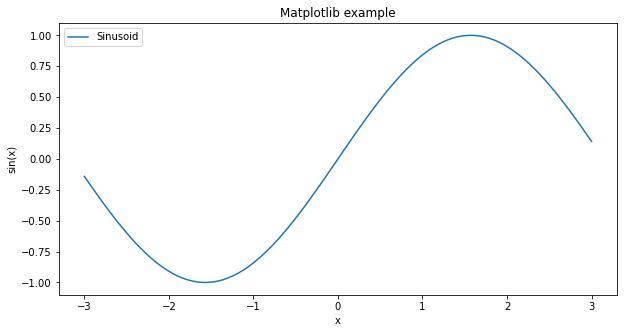

In [21]:
x_values = np.linspace(-3, 3, 100)

plt.figure(figsize=(10,5))
plt.plot(x_values, np.sin(x_values), label="Sinusoid")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Matplotlib example")
plt.legend(loc="upper left")
plt.show()

### Exercise 6:
Plot Gaussian distribution with mean $1$ and variance $0.7$
\begin{equation}
p(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{(-\frac{1}{2}(\frac{x - \mu}{\sigma})^2)}
\end{equation}

In [22]:
mu = 1
sigma = np.sqrt(0.7)
def Gaussian_distribution(x):
    return 1/sigma*np.sqrt(2*np.pi) * np.exp(-0.5*(x-mu)**2/sigma**2)

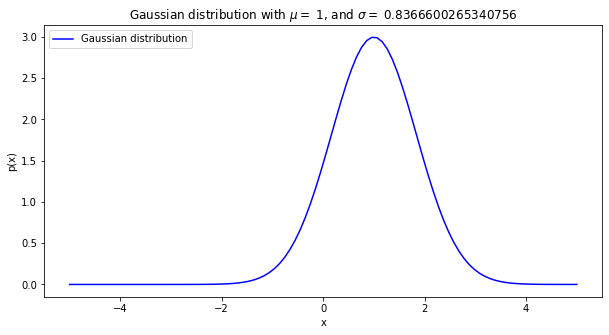

In [23]:
x = np.linspace(-5,5,100)

plt.figure(figsize=(10,5))
plt.plot(x, Gaussian_distribution(x), "b", label="Gaussian distribution")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.title("Gaussian distribution with $\mu =$ {}, and $\sigma = $ {}".format(mu, sigma))
plt.legend(loc="upper left")
plt.show()

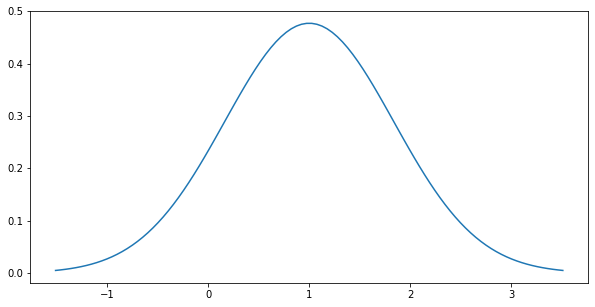

In [24]:
import scipy.stats as stats

plt.figure(figsize=(10,5))
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

### Exercise 7: Optimization

 Consider a function $f(\mathbf{x}) = \mathbf{x}^T \mathbf{A} \mathbf{x} + \mathbf{v}^T \mathbf{x}$, where $\mathbf{x}, \mathbf{v} \in \mathbb{R}^{d_n}$ and $\mathbf{A}$ is a
positive definite matrix.Minimize the function numerically.

Plot the function and check that the minimum is where it is supposed to
be

In [25]:
import scipy.optimize
d_n = 2;
# A = np.random.randn((d_n, d_n));
# A = A @ A.T + np.eye(d_n);

A = np.diag([1.,  2.])
v = np.random.randn(d_n, 1);
f = lambda x: x.T @ A @ x + v.T @ x
x0 = np.array([[0.0], [0.0]])
res = scipy.optimize.minimize(f, x0=x0)
res.x

array([0.04742854, 0.49891988])

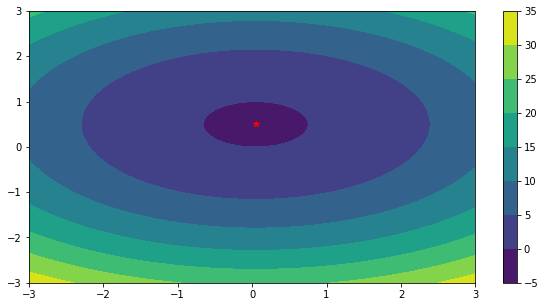

In [26]:
x0s = np.linspace(-3,3,100)  # creating linearly spaced values in the interval (-3, 3). 
x1s = np.linspace(-3,3,100)
gridx0, gridx1 = np.meshgrid(x0s,x1s) # create a rectangular grid 
z = np.zeros(gridx0.shape)
for i in range(gridx0.shape[0]): # Access each index of the grid
    for j in range(gridx0.shape[1]):
        cx = np.array([gridx0[i,j],gridx1[i,j]])  # get the corresponding index in the rectangle
        z[i,j] = f(cx) # evaluate f

plt.figure(figsize=(10,5))
plt.contourf(x0s, x1s, z) # display three-dimensional data in two dimensions using contours or color-coded regions
plt.colorbar()
plt.plot(res.x[0], res.x[1], 'r*');

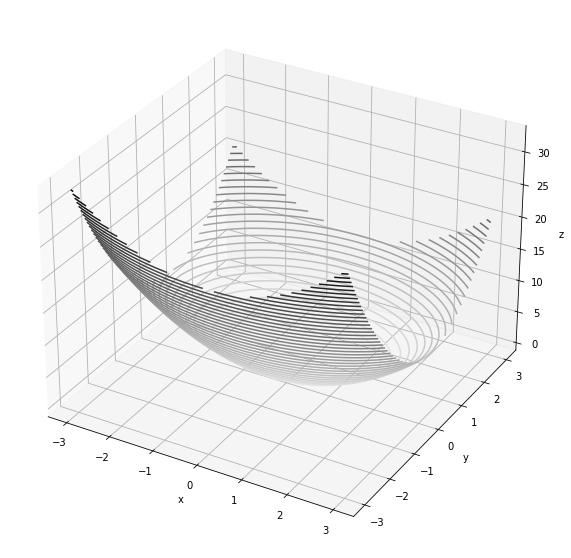

In [27]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(x0s,x1s,z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

# Condition

In [28]:
my_variable = 5
if my_variable < 0:
  print("negative")
elif my_variable == 0:
  print("null")
else: # my_variable > 0
  print("positive")

positive


# `For` loop

If the goal is simply to iterate over a range of numbers, we can do so directly as follows

In [29]:
for element in range(10):
    print(element)

0
1
2
3
4
5
6
7
8
9
